# Problem(a)

In [1]:
# -*- coding: utf-8 -*-
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt
#sdf

## Computer Tech

In [2]:
c1_graphics = ['comp.graphics']
c1_misc = ['comp.os.ms-windows.misc']
c1_pc = ['comp.sys.ibm.pc.hardware']
c1_mac = ['comp.sys.mac.hardware']
c1_graphics_train = fetch_20newsgroups(subset = 'train', categories = c1_graphics, shuffle=True, random_state=42)
c1_misc_train = fetch_20newsgroups(subset = 'train', categories = c1_misc, shuffle=True, random_state=42)
c1_pc_train = fetch_20newsgroups(subset = 'train', categories = c1_pc, shuffle=True, random_state=42)
c1_mac_train = fetch_20newsgroups(subset = 'train', categories = c1_mac, shuffle=True, random_state=42)

## Recreational Activity


In [3]:
c2_autos = ['rec.autos']
c2_motocycle = ['rec.motorcycles']
c2_baseball = ['rec.sport.baseball']
c2_hockey = ['rec.sport.hockey']
c2_autos_train = fetch_20newsgroups(subset = 'train', categories = c2_autos, shuffle=True, random_state=42)
c2_motocycle_train = fetch_20newsgroups(subset = 'train', categories = c2_motocycle, shuffle=True, random_state=42)
c2_baseball_train = fetch_20newsgroups(subset = 'train', categories = c2_baseball, shuffle=True, random_state=42)
c2_hockey_train = fetch_20newsgroups(subset = 'train', categories = c2_hockey, shuffle=True, random_state=42)

## Histogram of per topic

/Users/huxiongfeng/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


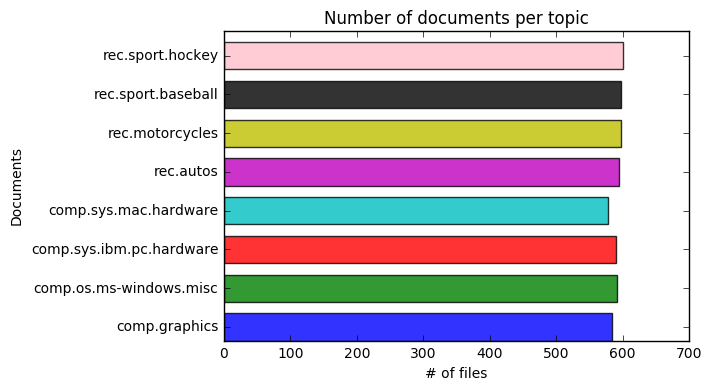

In [4]:
values = []
values = (len(c1_graphics_train.data), len(c1_misc_train.data),  len(c1_pc_train.data), len(c1_mac_train.data), len(c2_autos_train.data), len(c2_motocycle_train.data), len(c2_baseball_train.data), len(c2_hockey_train.data))
index = np.arange(8)
bar_width = 0.7
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink']
bars = plt.barh(index, values, bar_width,alpha = 0.8, color = color)
plt.xlabel("# of files")
plt.ylabel('Documents')
plt.title('Number of documents per topic')
plt.yticks(index + bar_width/2, ('comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey'))
plt.xlim(0,700)
plt.legend()
plt.show()

# Problem(b)

In [9]:
from sklearn.feature_extraction import text
import re
import nltk 
import string
import numpy as np
import _pickle as cPickle
from sklearn.feature_extraction import text

## Define a tokenizer

In [10]:
stop_words = text.ENGLISH_STOP_WORDS

from nltk.stem.snowball import SnowballStemmer
from nltk.tag import pos_tag
stemmer = SnowballStemmer("english")

def tokenizer_fun(text):
    new_text = re.sub(r'[^A-Za-z]', " ", text)
    new_text = re.sub("[,.-:/()?{}*$#&]"," ",new_text)  # remove all symbols
    new_text = "".join([ch for ch in new_text if ch not in string.punctuation])  # remove all punctuation
    new_text = "".join(ch for ch in new_text if ord(ch) < 128)  # remove all non-ascii characters
    new_text = new_text.lower() # convert to lowercase
    tokens =[word for sent in nltk.sent_tokenize(new_text) for word in nltk.word_tokenize(sent)]
    new_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]{2,}', token):
            new_tokens.append(token)     
    stem = [stemmer.stem(t) for t in new_tokens]
    tagged_sent = pos_tag(stem)
    new_stem = [word for word,pos in tagged_sent if pos == 'NN'] # remove all non-noun words
    return new_stem

from sklearn.datasets import fetch_20newsgroups
all_data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=('headers','footers','quotes'))

from sklearn.feature_extraction.text import TfidfVectorizer
TFxIDF = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
TFxIDF_data = TFxIDF.fit_transform(all_data.data)

## Terms we extracted based on our tokenizer function

In [12]:
print (TFxIDF_data.shape)

(18846, 57177)


# Problem(c)

## Report 10 most significant terms

In [14]:
my_list=['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']

for category in my_list:
    categories = [category]
    sub_data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    TFxIDF_sub = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, max_features=10, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}')
    sub_count = TFxIDF_sub.fit_transform(sub_data.data)
    print (TFxIDF_sub.vocabulary_.keys())

dict_keys(['card', 'control', 'use', 'drive', 'disk', 'scsi', 'pc', 'problem', 'bus', 'time'])
dict_keys(['bit', 'appl', 'monitor', 'card', 'use', 'drive', 'problem', 'disk', 'work', 'mac'])
dict_keys(['sale', 'mail', 'game', 'condit', 'price', 'drive', 'ship', 'card', 'use', 'offer'])
dict_keys(['thing', 'christ', 'church', 'word', 'peopl', 'god', 'way', 'jesus', 'sin', 'time'])


In [ ]:
#fetch data
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer
from sklearn.datasets import fetch_20newsgroups
twenty_all = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
print(len(twenty_all.data))
print (twenty_all.target[0])

#count term

twenty_all_X = twenty_all.data
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(twenty_all_X)
X = X_counts.toarray()

vocab_new={}
vocab = count_vect.vocabulary_
stemmer = PorterStemmer()
for i in vocab:
    word = stemmer.stem(i)
    if word in vocab_new:
        vocab_new[word].append(vocab[i])
    else:
        vocab_new[word]=[vocab[i]]
term_num = len(vocab_new)
print (term_num)

doc_num = X.shape[0]
X_new = np.array ([ [ 0 for i in range(term_num)] for j in range(doc_num) ])
keys = vocab_new.keys()
for i in range(doc_num):
    # if i%100==0:
    #     print i
    for j in range(len(keys)):
        idxs = vocab_new[keys[j]]
        for idx in idxs:
            X_new[i][j]+=X[i][idx]
print (X_new.shape)
#X_counts_arr = X_new



18846
10
149250


In [3]:
#class term
term_num = len(X_counts_arr[0])
class_counts = [[0 for i in range(term_num)] for i in range(20)]
for i in range(len(X_counts_arr)):
	class_num = twenty_all.target[i]
class_counts[class_num] = [x+y for x, y in zip(class_counts[class_num], X_counts_arr[i])]


NameError: name 'X_counts_arr' is not defined

In [ ]:
#tficf
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
#class_counts = np.load('/Users/Yingze/Desktop/class_counts.npy')
tfidf_transformer = TfidfTransformer()
class_tficf = tfidf_transformer.fit_transform(class_counts)
class_tficf_arr = class_tficf.toarray()
#sort
keys=vocab_new.keys()
map={}
for i in range(len(keys)):
	map[keys[i]] = class_tficf_arr[:,i]
#[3, 4, 6, 15]
for i in [3,4,6,15]:
	res = sorted(map.items(), key =lambda x:x[1][i])
    res.reverse()
	for j in range(10):
		print (res[j][0],)
	print ("\n")

#result:
# term number = 149250
# scsi edu drive line com ide subject use organ card 

# edu line mac subject organ use appl quadra post problem 

# edu 00 line subject sale organ post univers com new 

# god christian edu church subject jesu homosexu peopl line sin 

# Problem(d)

## LSI on TDxIDF

In [15]:
from sklearn.decomposition import TruncatedSVD
X = TruncatedSVD(n_components=50, algorithm='arpack')
LSI = X.fit_transform(TFxIDF_data)

In [17]:
print (LSI.shape)

(18846, 50)


# Problem(e)

Linear Support Vector Machines

In [18]:
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.ibm.pc.hardware','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']

def data_fun(train_or_test):
    if(train_or_test == 'train'):
        data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    if(train_or_test == 'test'):
        data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    return data  

def LSI_fun(train_or_test):
    if(train_or_test == 'train'):
        data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
        TFxIDF_sub = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
        TFxIDF_sub_data = TFxIDF_sub.fit_transform(data.data)
        Y = TruncatedSVD(n_components=50, algorithm='arpack')
        sub_LSI = Y.fit_transform(TFxIDF_sub_data)
    if(train_or_test == 'test'):
        data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
        TFxIDF_sub = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
        TFxIDF_sub_data = TFxIDF_sub.fit_transform(data.data)
        Y = TruncatedSVD(n_components=50, algorithm='arpack')
        sub_LSI = Y.fit_transform(TFxIDF_sub_data)
    return sub_LSI 

### Construct a training set

In [19]:
train_LSI = LSI_fun('train')
train_set = data_fun('train')
# separate into two groups(Computer Tech & Recreation)
train_target_group = [ int(x / 4) for x in train_set.target]

In [21]:
print (len(train_target_group))

4154


### Build a SVM classifier

In [22]:
from sklearn import svm
lin_svc = svm.LinearSVC()
lin_svc.fit(train_LSI, train_target_group)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### Construct a testing set

In [24]:
test_LSI = LSI_fun('test')
test_set = data_fun('test')
test_target_group = [ int(x / 4) for x in test_set.target]
svm_predicted = lin_svc.predict(test_LSI)
print (test_target_group[0:40]-svm_predicted[0:40])
y_score = lin_svc.fit(train_LSI, train_target_group).decision_function(test_LSI)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0 -1  0
  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]


In [25]:
print (y_score[0:20])
print (y_score.shape, svm_predicted.shape)

[ 0.47772112 -2.57315191  0.44154641 -2.81875319 -3.09670104  0.72026004
  0.2181448  -3.43185397 -1.0822708   0.5388148  -0.64010208  0.90236963
  1.50182214  1.64680493  0.38907222  1.18927167  0.78654305 -0.04299434
 -1.85206595  1.21168861]
(2765,) (2765,)


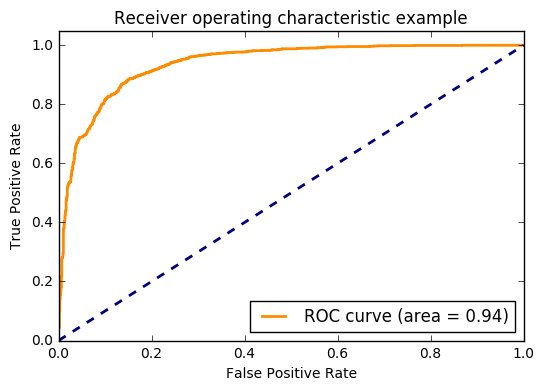

In [26]:
y_score_test = lin_svc.decision_function(test_LSI)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[ 960  215]
 [ 155 1435]]
Normalized confusion matrix
[[ 0.82  0.18]
 [ 0.1   0.9 ]]


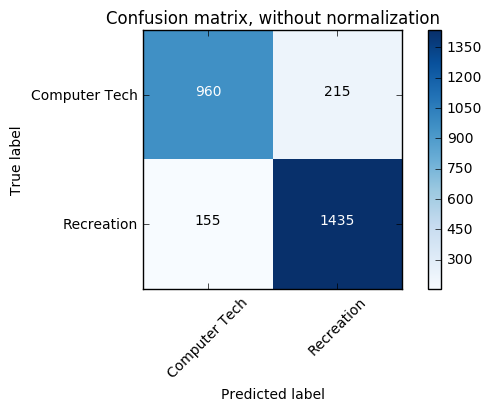

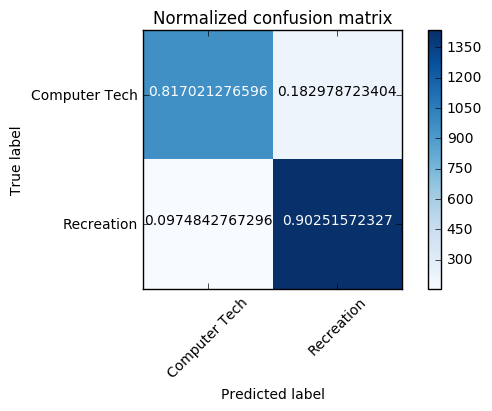

In [27]:
svm_predicted = lin_svc.predict(test_LSI)
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['Computer Tech', 'Recreation']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, svm_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Linear SVM---Accuracy, Recall and Precision

In [28]:
from sklearn.metrics import accuracy_score
svm_accuracy = accuracy_score(test_target_group, svm_predicted)
print (svm_accuracy)

0.866184448463


In [29]:
from sklearn.metrics import recall_score
svm_recall_score = recall_score(test_target_group, svm_predicted)
print (svm_recall_score)

0.90251572327


In [30]:
from sklearn.metrics import precision_score
svm_precision_score = precision_score(test_target_group, svm_predicted)
print (svm_precision_score)

0.869696969697


# Problem(f)
soft margin SVM

### Split the data into 5 fold

In [31]:
from sklearn.cross_validation import KFold
kf = KFold(len(train_target_group), n_folds=5,shuffle=True,random_state=42)

/Users/huxiongfeng/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
print (kf)

sklearn.cross_validation.KFold(n=4154, n_folds=5, shuffle=True, random_state=42)


### Build 5*7 SVM classifiers

In [35]:
from sklearn import svm
matrix = [[0]*7 for i in range(5)]
i = 0
j = 0

for train_index, test_index in kf:
    X_train, X_test = train_LSI[train_index], train_LSI[test_index]
    for k in [-3, -2, -1, 0, 1, 2, 3]:
        X_train_target_group = [ int(x / 4) for x in train_set.target[train_index]]
        X_test_target_group = [ int(x / 4) for x in train_set.target[test_index]]
        
        soft_svm_clf = svm.LinearSVC(C=10**k)
        soft_svm_clf.fit(X_train, X_train_target_group)
        score = soft_svm_clf.score(X_test, X_test_target_group)
        matrix[i][j]=score
        j=j+1
    i=i+1
    j=0

In [36]:
import numpy as np
avg_value = np.array(matrix)
print (avg_value.shape)

(5, 7)


In [38]:
max = 0
max_index = 0
for i in range (7):
    mean = np.mean(avg_value[:,i:i+1])
    if max < mean:
        max = mean
        max_index = i
print (max, max_index)
penalty = [-3, -2, -1, 0, 1, 2, 3]
print ('The best penalty value is',10**-penalty[max_index])   

0.934520754498 5
The best penalty value is 0.01


In [39]:
from sklearn import svm
soft_svc = svm.LinearSVC(C=10**-2)
soft_svc.fit(train_LSI, train_target_group)
soft_svc_predicted = soft_svc.predict(test_LSI)
score = soft_svc.score(test_LSI, test_target_group)
print (score)

0.834719710669


### Soft_SVM Confusion Matrix

Confusion matrix, without normalization
[[ 758  417]
 [  40 1550]]
Normalized confusion matrix
[[ 0.65  0.35]
 [ 0.03  0.97]]


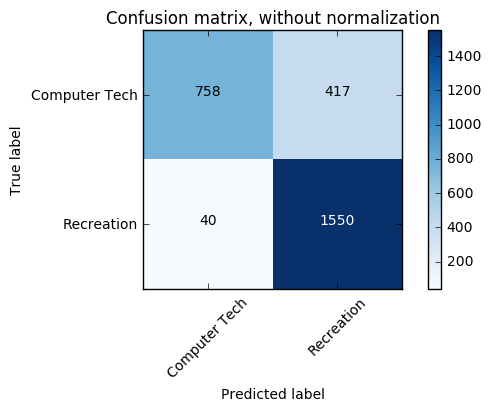

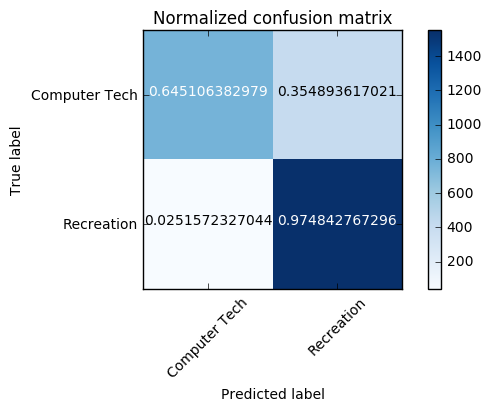

In [40]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['Computer Tech', 'Recreation']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, soft_svc_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Soft Margin SVM---Accuracy, Recall and Precision

In [41]:
from sklearn.metrics import accuracy_score
soft_svc_accuracy = accuracy_score(test_target_group, soft_svc_predicted)
print (soft_svc_accuracy)

0.834719710669


In [42]:
from sklearn.metrics import precision_score
soft_svc_precision_score = precision_score(test_target_group, soft_svc_predicted)
print (soft_svc_precision_score)

0.788002033554


In [43]:
from sklearn.metrics import recall_score
soft_svc_recall_score = recall_score(test_target_group, soft_svc_predicted)
print (soft_svc_recall_score)

0.974842767296


# Problem(g)
Naive Bayes algorithm

In [44]:
from sklearn.naive_bayes import GaussianNB # BernoulliNB
from sklearn.naive_bayes import BernoulliNB
# nb_clf = GaussianNB()
nb_clf = BernoulliNB()
nb_clf.fit(train_LSI, train_target_group)
nb_predicted = nb_clf.predict(test_LSI)

In [45]:
y_score_test_nb = nb_clf.predict(test_LSI)
print(y_score_test_nb.shape)
print(y_score_test_nb[0:10])

(2765,)
[0 0 0 0 0 1 0 0 0 1]


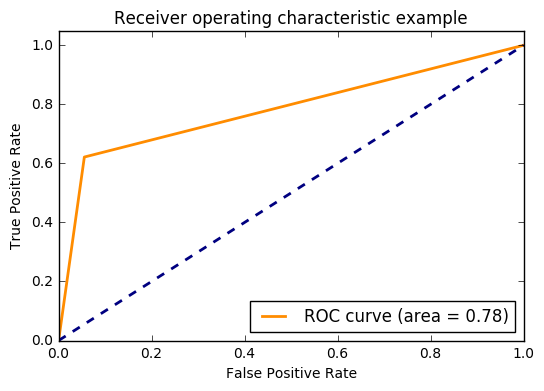

In [46]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test_nb)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[1110   65]
 [ 602  988]]
Normalized confusion matrix
[[ 0.94  0.06]
 [ 0.38  0.62]]


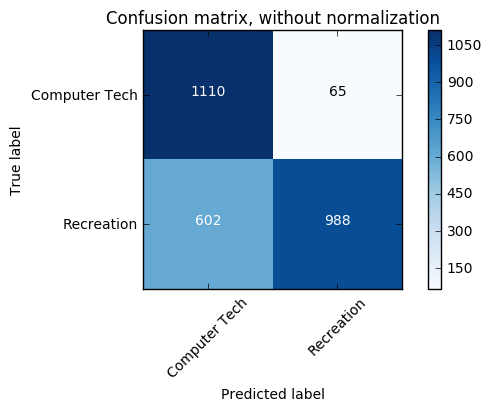

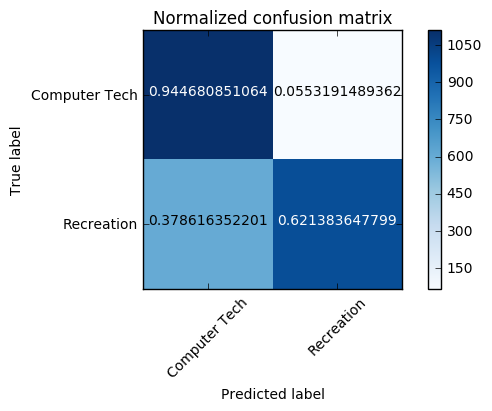

In [47]:
nb_predicted = nb_clf.predict(test_LSI)
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['Computer Tech', 'Recreation']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, nb_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Naive Bayes---Accuracy, Recall and Precision

In [48]:
from sklearn.metrics import accuracy_score
nb_accuracy = accuracy_score(test_target_group, nb_predicted)
print (nb_accuracy)

0.75877034358


In [49]:
from sklearn.metrics import recall_score
nb_recall_score = recall_score(test_target_group, nb_predicted)
print (nb_recall_score)

0.621383647799


In [50]:
from sklearn.metrics import precision_score
nb_precision_score = precision_score(test_target_group, nb_predicted)
print (nb_precision_score)

0.938271604938


# Problem(h) && Problem(i)
h --- l-2 norm
i --- l-1 norm

## l-2 norm Logistic Regression

In [51]:
from sklearn import linear_model, datasets
lr_norm2 = linear_model.LogisticRegression()
lr_norm2.fit(train_LSI, train_target_group)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

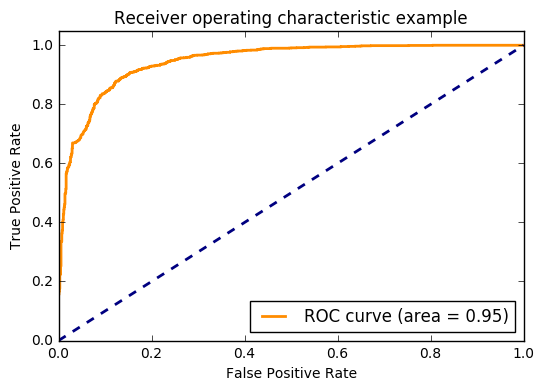

In [52]:
y_score_test_lr_norm2 = lr_norm2.decision_function(test_LSI)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test_lr_norm2)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[ 920  255]
 [ 107 1483]]
Normalized confusion matrix
[[ 0.78  0.22]
 [ 0.07  0.93]]


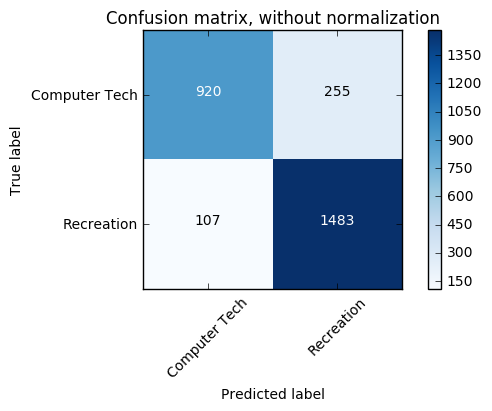

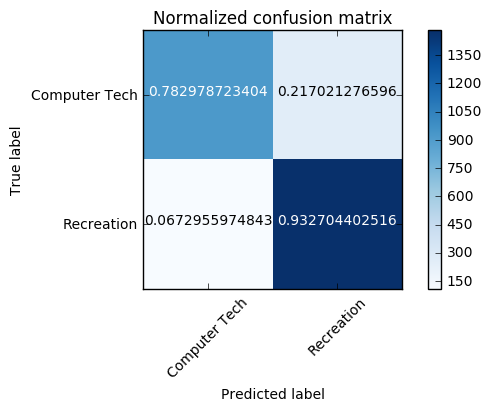

In [53]:
lr_norm2_predicted = lr_norm2.predict(test_LSI)
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['Computer Tech', 'Recreation']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, lr_norm2_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Logistic Regression l-2 norm---Accuracy, Recall and Precision

In [54]:
from sklearn.metrics import accuracy_score
lr_norm2_accuracy = accuracy_score(test_target_group, lr_norm2_predicted)
print (lr_norm2_accuracy)

0.869077757685


In [55]:
from sklearn.metrics import recall_score
lr_norm2_recall_score = recall_score(test_target_group, lr_norm2_predicted)
print (lr_norm2_recall_score)

0.932704402516


In [56]:
from sklearn.metrics import precision_score
lr_norm2_precision_score = precision_score(test_target_group, lr_norm2_predicted)
print (lr_norm2_precision_score)

0.853279631761


In [58]:
from sklearn.metrics import confusion_matrix

coef = [0.01, 0.1, 1, 10, 100, 1000, 10000]
for c in coef:
    lr_norm2 = linear_model.LogisticRegression(C = c)
    lr_norm2.fit(train_LSI, train_target_group)
    lr_norm2_predicted = lr_norm2.predict(test_LSI)
    y_score_test_lr_norm2 = lr_norm2.decision_function(test_LSI)
    print ("coef:", c)
    print (y_score_test_lr_norm2)
    print (confusion_matrix(test_target_group, lr_norm2_predicted))

coef: 0.01
[ 0.28  0.09  0.3  ...,  0.35  0.39  0.31]
[[  79 1096]
 [   0 1590]]
coef: 0.1
[ 0.41 -0.86  0.47 ...,  0.84  1.11  0.5 ]
[[ 786  389]
 [  46 1544]]
coef: 1
[ 0.76 -3.23  0.8  ...,  2.01  2.9   0.86]
[[ 920  255]
 [ 107 1483]]
coef: 10
[ 1.36 -7.53  1.13 ...,  3.82  5.73  1.54]
[[ 976  199]
 [ 164 1426]]
coef: 100
[  2.29 -15.32   1.44 ...,   6.85  10.34   3.09]
[[ 990  185]
 [ 192 1398]]
coef: 1000
[  3.18 -24.81   1.74 ...,   9.85  15.21   4.48]
[[ 961  214]
 [ 228 1362]]
coef: 10000
[  3.64 -30.06   1.9  ...,  10.85  17.2    4.53]
[[ 938  237]
 [ 253 1337]]


## l-1 norm Logistic Regression

In [59]:
from sklearn import linear_model, datasets
lr_norm1 = linear_model.LogisticRegression(penalty = 'l1')
lr_norm1.fit(train_LSI, train_target_group)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

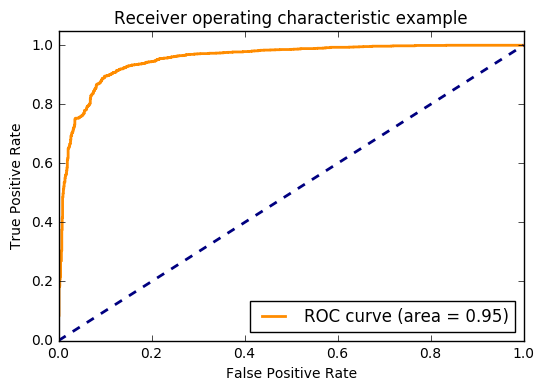

In [60]:
y_score_test_lr_norm1 = lr_norm1.decision_function(test_LSI)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test_lr_norm1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[1030  145]
 [ 144 1446]]
Normalized confusion matrix
[[ 0.88  0.12]
 [ 0.09  0.91]]


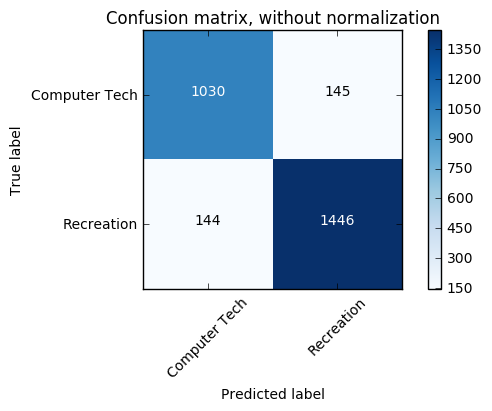

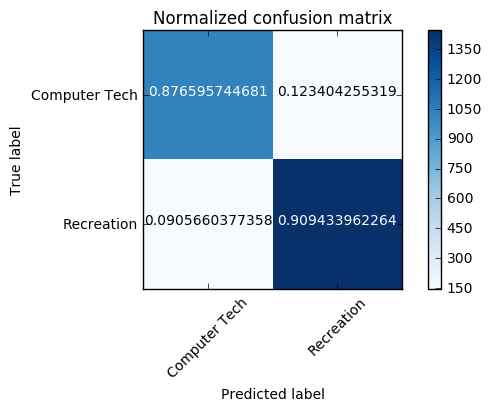

In [61]:
lr_norm1_predicted = lr_norm1.predict(test_LSI)
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['Computer Tech', 'Recreation']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, lr_norm1_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Logistic Regression l-1 norm---Accuracy, Recall and Precision

In [62]:
from sklearn.metrics import accuracy_score
lr_norm1_accuracy = accuracy_score(test_target_group, lr_norm1_predicted)
print (lr_norm1_accuracy)

0.89547920434


In [63]:
from sklearn.metrics import recall_score
lr_norm1_recall_score = recall_score(test_target_group, lr_norm1_predicted)
print (lr_norm1_recall_score)

0.909433962264


In [64]:
from sklearn.metrics import precision_score
lr_norm1_precision_score = precision_score(test_target_group, lr_norm1_predicted)
print (lr_norm1_precision_score)

0.908862350723


In [66]:
from sklearn.metrics import confusion_matrix

coef = [0.01, 0.1, 1, 10, 100, 1000, 10000]
for c in coef:
    lr_norm1 = linear_model.LogisticRegression(C = c)
    lr_norm1.fit(train_LSI, train_target_group)
    lr_norm1_predicted = lr_norm1.predict(test_LSI)
    y_score_test_lr_norm1 = lr_norm1.decision_function(test_LSI)
    print ("coef:", c)
    print y_score_test_lr_norm1
    print confusion_matrix(test_target_group, lr_norm1_predicted)

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-66-2ef1503a4877>, line 10)

# Problem(j)

In [67]:
categories_i = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']

In [68]:
def data_i(train_or_test):
    if(train_or_test == 'train'):
        data = fetch_20newsgroups(subset='train', categories=categories_i, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    if(train_or_test == 'test'):
        data = fetch_20newsgroups(subset='test', categories=categories_i, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    return data  

def LSI_i(train_or_test):
    if(train_or_test == 'train'):
        data = fetch_20newsgroups(subset='train', categories=categories_i, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
        TFxIDF_sub = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
        TFxIDF_sub_data = TFxIDF_sub.fit_transform(data.data)
        Y = TruncatedSVD(n_components=50, algorithm='arpack')
        sub_LSI = Y.fit_transform(TFxIDF_sub_data)
    if(train_or_test == 'test'):
        data = fetch_20newsgroups(subset='test', categories=categories_i, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
        TFxIDF_sub = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
        TFxIDF_sub_data = TFxIDF_sub.fit_transform(data.data)
        Y = TruncatedSVD(n_components=50, algorithm='arpack')
        sub_LSI = Y.fit_transform(TFxIDF_sub_data)
    return sub_LSI 

In [69]:
train_LSI_i = LSI_i('train')
test_LSI_i  = LSI_i('test')
train_set_i = data_i('train')
test_set_i  = data_i('test')

In [70]:
train_i_target_group = [ int(x / 4) for x in train_set_i.target]
test_i_target_group = [ int(x / 4) for x in test_set_i.target]

In [72]:
print (train_set_i.target)
print (train_set_i.target.shape)

[3 2 0 ..., 1 1 1]
(2352,)


## Naive Bayes classification

In [97]:
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB().fit(train_LSI_i, train_set_i.target)

In [98]:
nb_predicted = nb_clf.predict(test_LSI_i)
print (nb_predicted.shape)

(1565,)


Confusion matrix, without normalization
[[156 125  77  34]
 [ 92 149  77  67]
 [ 73 117 116  84]
 [119  19  42 218]]
(4, 4)
Normalized confusion matrix
[[ 0.4   0.32  0.2   0.09]
 [ 0.24  0.39  0.2   0.17]
 [ 0.19  0.3   0.3   0.22]
 [ 0.3   0.05  0.11  0.55]]
(4, 4)


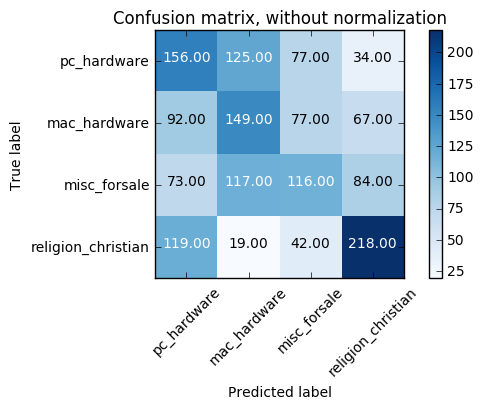

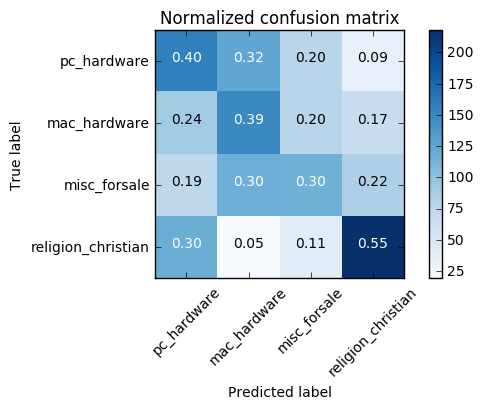

In [99]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['pc_hardware', 'mac_hardware', 'misc_forsale', 'religion_christian']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print (cm.shape)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "%.2f"%cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_set_i.target, nb_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [100]:
from sklearn.metrics import accuracy_score
nb_accuracy = accuracy_score(test_set_i.target, nb_predicted)
print (nb_accuracy)

0.408306709265


In [101]:
from sklearn.metrics import recall_score
nb_recall_score = recall_score(test_set_i.target, nb_predicted,average='weighted')
print (nb_recall_score)

0.408306709265


In [102]:
from sklearn.metrics import precision_score
nb_precision_score = precision_score(test_set_i.target, nb_predicted,average='weighted')
print (nb_precision_score)

0.40842922536


## Multiclass SVM classification

### One VS One

In [103]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

ovo_svc = OneVsOneClassifier(LinearSVC(C=100, random_state=42)).fit(train_LSI_i, train_set_i.target)

In [104]:
ovo_predicted = ovo_svc.predict(test_LSI_i)
print (ovo_svc.predict(test_LSI_i))

[0 0 1 ..., 0 3 3]


Confusion matrix, without normalization
[[119 144 125   4]
 [ 90 193  94   8]
 [126 129  96  39]
 [  3  30  13 352]]
(4, 4)
Normalized confusion matrix
[[ 0.3   0.37  0.32  0.01]
 [ 0.23  0.5   0.24  0.02]
 [ 0.32  0.33  0.25  0.1 ]
 [ 0.01  0.08  0.03  0.88]]
(4, 4)


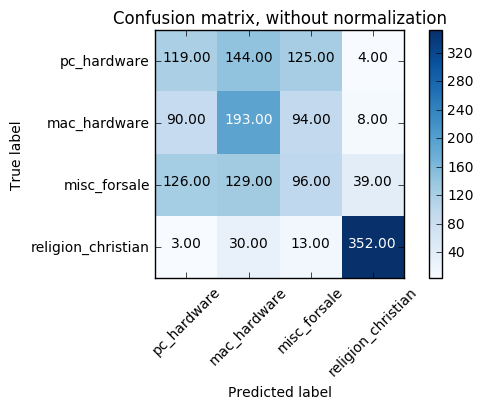

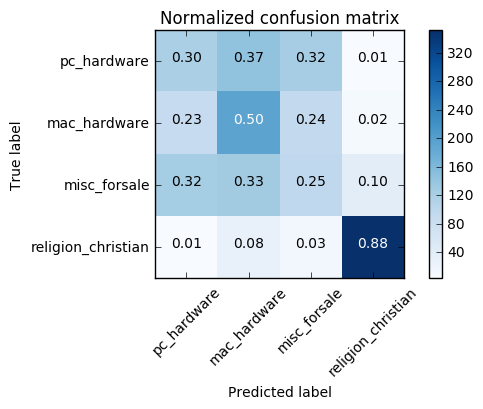

In [105]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['pc_hardware', 'mac_hardware', 'misc_forsale', 'religion_christian']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print (cm.shape)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "%.2f"%cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_set_i.target, ovo_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [106]:
from sklearn.metrics import accuracy_score
ovo_predicted_predicted_accuracy = accuracy_score(test_i_target_group, ovo_predicted)
print (ovo_predicted_predicted_accuracy)

0.215974440895


In [107]:
from sklearn.metrics import recall_score
ovo_predicted_recall_score = recall_score(test_set_i.target, ovo_predicted,average='weighted')
print (ovo_predicted_recall_score)

0.485623003195


In [108]:
from sklearn.metrics import precision_score
ovo_predicted_precision_score = precision_score(test_set_i.target, ovo_predicted,average='weighted')
print (ovo_predicted_precision_score)

0.478977251033


### One VS Rest

In [109]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

ovr_svc = OneVsRestClassifier(LinearSVC(C=1000, random_state=42)).fit(train_LSI_i, train_set_i.target)

In [110]:
ovr_predicted = ovr_svc.predict(test_LSI_i)
print (ovr_svc.predict(test_LSI_i))

[3 2 2 ..., 0 1 3]


Confusion matrix, without normalization
[[107 119 162   4]
 [ 80 168 129   8]
 [102  79 174  35]
 [  0   8  36 354]]
(4, 4)
Normalized confusion matrix
[[ 0.27  0.3   0.41  0.01]
 [ 0.21  0.44  0.34  0.02]
 [ 0.26  0.2   0.45  0.09]
 [ 0.    0.02  0.09  0.89]]
(4, 4)


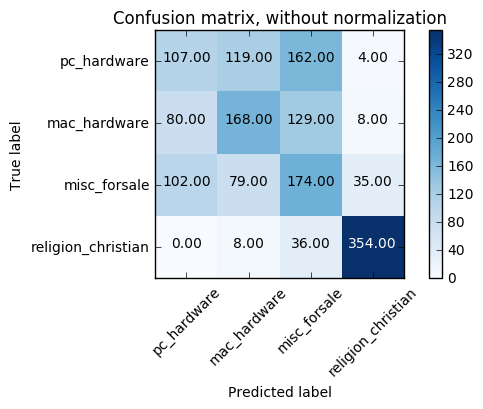

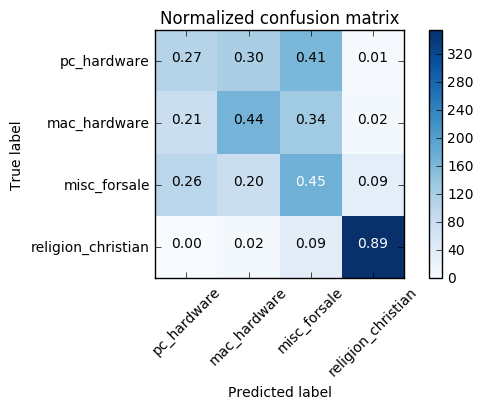

In [111]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['pc_hardware', 'mac_hardware', 'misc_forsale', 'religion_christian']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print (cm.shape)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "%.2f"%cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_set_i.target, ovr_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## One VS Rest Multiclass SVM---Accuracy, Recall and Precision

In [112]:
from sklearn.metrics import accuracy_score
ovr_predicted_accuracy = accuracy_score(test_i_target_group, ovr_predicted)
print (ovr_predicted_accuracy)

0.184664536741


In [113]:
from sklearn.metrics import recall_score
ovr_predicted_recall_score = recall_score(test_set_i.target, ovr_predicted,average='weighted')
print (ovr_predicted_recall_score)

0.513099041534


In [114]:
from sklearn.metrics import precision_score
ovr_predicted_precision_score = precision_score(test_set_i.target, ovr_predicted,average='weighted')
print (ovr_predicted_precision_score)

0.514298304991
